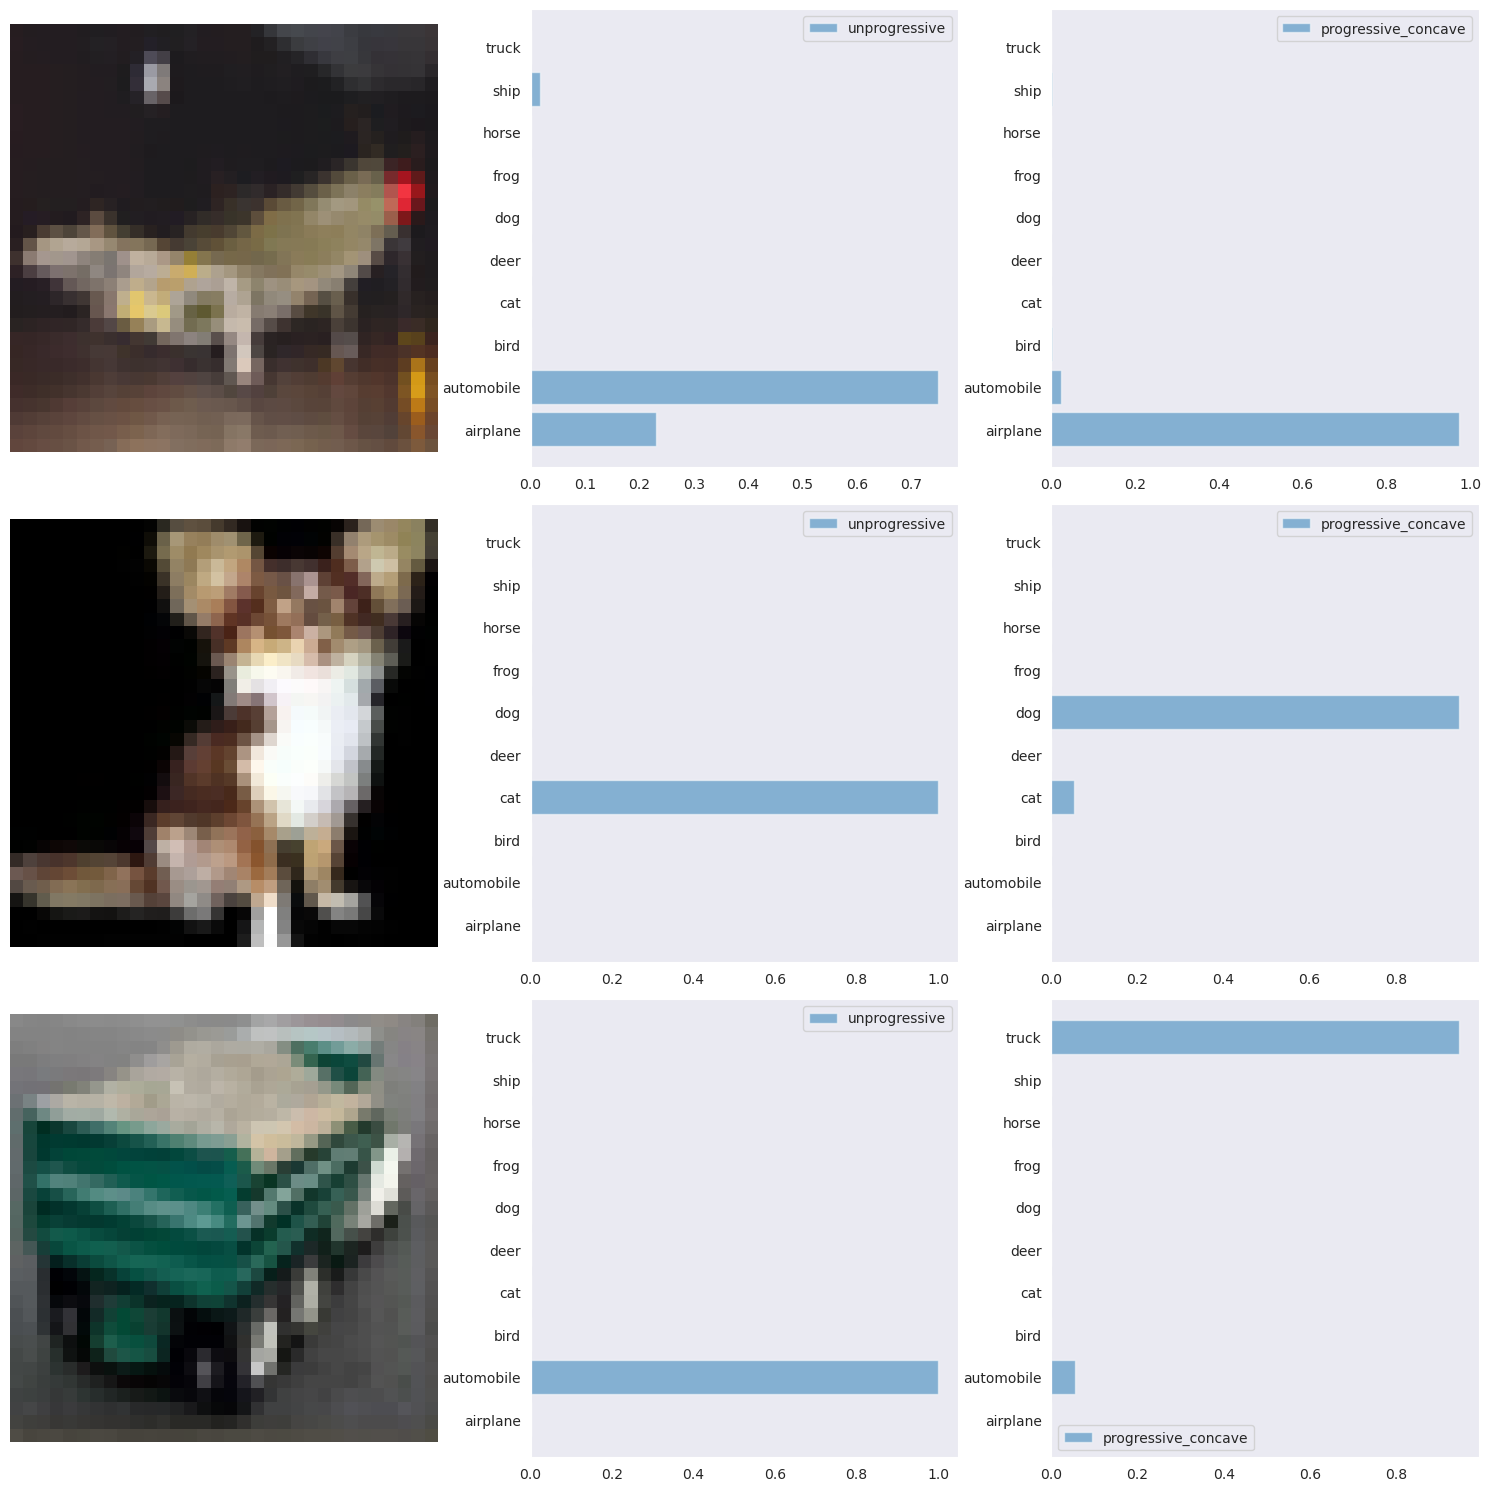

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
text_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

file_path = 'wrong_pred_datas.npy'
data = np.load(file_path, allow_pickle=True)
wrong_pred_datas = data.item()

def visualize_dataset(wrong_image, unprogressive_probs, progressive_concave_probs, nshow=3):
    nimages = len(wrong_image)
    samples = np.random.randint(0, nimages, nshow)
    
    with sns.axes_style('dark'):
        fig, ax = plt.subplots(nshow, 3, figsize=(15, 5 * nshow))
        for i, sample in enumerate(samples):
            ax[i, 0].imshow(wrong_image[sample])
            ax[i, 0].axis('off')
            ax[i, 1].barh(text_labels, unprogressive_probs[sample], alpha=0.5, label='unprogressive')
            ax[i, 1].legend()
            ax[i, 2].barh(text_labels, progressive_concave_probs[sample], alpha=0.5, label='progressive_concave')
            ax[i, 2].legend()
            fig.tight_layout()

def show_correct_progressive_wrong_unprogressive(wrong_pred_datas, nshow=3):
    progressive_concave_preds = np.argmax(wrong_pred_datas['progressive_concave'], axis=1)
    unprogressive_preds = np.argmax(wrong_pred_datas['unprogressive'], axis=1)
    y_true = y_test.flatten()
    

    correct_progressive_wrong_unprogressive_indices = np.where(
        (progressive_concave_preds == y_true) & (unprogressive_preds != y_true)
    )

    wrong_image = x_test[correct_progressive_wrong_unprogressive_indices]
    progressive_concave_probs = wrong_pred_datas['progressive_concave'][correct_progressive_wrong_unprogressive_indices]
    unprogressive_probs = wrong_pred_datas['unprogressive'][correct_progressive_wrong_unprogressive_indices]

    visualize_dataset(wrong_image, unprogressive_probs, progressive_concave_probs, nshow)

# Call the function to visualize the images
show_correct_progressive_wrong_unprogressive(wrong_pred_datas, nshow=3)


In [9]:
    y_test


array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)